In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

In [30]:
customers = pd.read_csv('https://downloader.disk.yandex.ru/disk/d707febc2514423e0728b2bb880286ea6c64f61f71d90b7c3e7216ffb2001638/61e83fac/l9rUW5QCYE1v_Vb85lc2_FJfwWdgMJ5VjRECL1sslDo-ICZm75VRCKxmbjQzyPRm81ySmP0WwqOBn9lSniY-Lg%3D%3D?uid=0&filename=olist_customers_dataset.csv&disposition=attachment&hash=8Kz5YKWEyf9uR%2BiXonnDbQPjoD5FBNU68Z6YaW30tmtQH3zipulfj/Xz9ZoCJjpPq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=9033957&hid=b675f8ba78c13d600facc03ba2033f9f&media_type=spreadsheet&tknv=v2')
orders = pd.read_csv('https://downloader.disk.yandex.ru/disk/4c35b067bfb3cf0f24b1518a8ad275bbc3a4c774e4ca06410e1a8f56eb49579e/61e83a3f/l9rUW5QCYE1v_Vb85lc2_FMCwvSWHpAnIgUxRQB6t1NE-kaLb2q1lfdqmkuuvbZRx6gQSQCHgBk324u3rpDj0Q%3D%3D?uid=0&filename=olist_orders_dataset.csv&disposition=attachment&hash=sIv9fr4pY%2B3CcVDAJ7cBLLyzYtCy9iy7hyVWXaX4owr1YRBUAzy8dR2bv3va4jhMq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=17654914&hid=87c93f55b161ccff733960c7e368d4e8&media_type=spreadsheet&tknv=v2')
order_items = pd.read_csv('https://downloader.disk.yandex.ru/disk/858675d890ad8c0f19c3d711711eb9275003c0251151aeec8f923c12977cfb1b/61e84d75/l9rUW5QCYE1v_Vb85lc2_BLqOxxhJrJbn52AF-XmD50NEbdTd8gXMRrqNXCXacfnpPZo6WuHinNd24yXhjMTJQ%3D%3D?uid=0&filename=olist_order_items_dataset.csv&disposition=attachment&hash=f081npP8ZuzgXd2HHZdYi0gpGuRjvwjnDbAcQYlk3L79wwtxLCyfpAux1UhFZV1Uq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=15438671&hid=86fa0ab2956a1f56a0c01e930a44f547&media_type=spreadsheet&tknv=v2')

# Задание №1. 
### Сколько у нас пользователей, которые совершили покупку только один раз?

In [31]:
customers_orders = customers.merge(orders, on='customer_id', how='inner')
# Найдем индексы записей, у которых зыказы не удовлетворяют определению покупки
idx_not_appr = customers_orders[['order_approved_at']].isna().query('order_approved_at == True').index
# Пользователи, совершившие одну покупку
num_cust_with_one_purch = customers_orders \
    .query('(index not in @idx_not_appr) and (order_status != "unavailable" or order_status != "canceled")') \
    .groupby('customer_unique_id', as_index=False) \
    .aggregate({'order_id':'count'}) \
    .rename(columns={'order_id':'purchases'}) \
    .query('purchases == 1').shape[0]

print(num_cust_with_one_purch, 'пользователей совершили покупку один раз')

93049 пользователей совершили покупку один раз


# Задание №2. 
### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [32]:
orders['canceled'] = orders.order_status == 'canceled'
orders['unavailable'] = orders.order_status == 'unavailable'
orders['canc_unvail'] = orders.order_status.apply(lambda x: True if x == 'canceled' or x == 'unavailable' else False)
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date)
orders['year_month'] = pd.to_datetime(orders.order_estimated_delivery_date).dt.to_period('M')
not_deliv_by_month = orders.groupby('year_month', as_index=False) \
    .aggregate({'canc_unvail':'sum', 'canceled':'sum', 'unavailable':'sum'})

print(int(not_deliv_by_month['canc_unvail'].mean()), 'заказов не доставляется в среднем за месяц')
print(int(not_deliv_by_month['canceled'].mean()), 'заказов не доставляется в среднем за месяц, по причине отмены')
print(int(not_deliv_by_month['unavailable'].mean()), 'заказов не доставляется в среднем за месяц, по причине их недействительности')

45 заказов не доставляется в среднем за месяц
23 заказов не доставляется в среднем за месяц, по причине отмены
22 заказов не доставляется в среднем за месяц, по причине их недействительности


In [33]:
not_deliv_by_month

,year_month,canc_unvail,canceled,unavailable
0,2016-09,1,1,0
1,2016-10,3,3,0
2,2016-11,19,14,5
3,2016-12,10,8,2
4,2017-01,0,0,0
5,2017-02,4,2,2
6,2017-03,92,26,66
7,2017-04,41,22,19
8,2017-05,39,23,16
9,2017-06,58,29,29


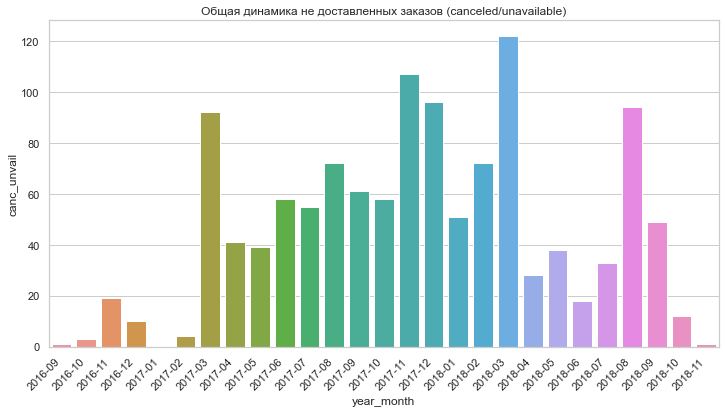

In [34]:
chart = sns.barplot(data=not_deliv_by_month, x='year_month', y='canc_unvail')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Общая динамика не доставленных заказов (canceled/unavailable)')
plt.show()

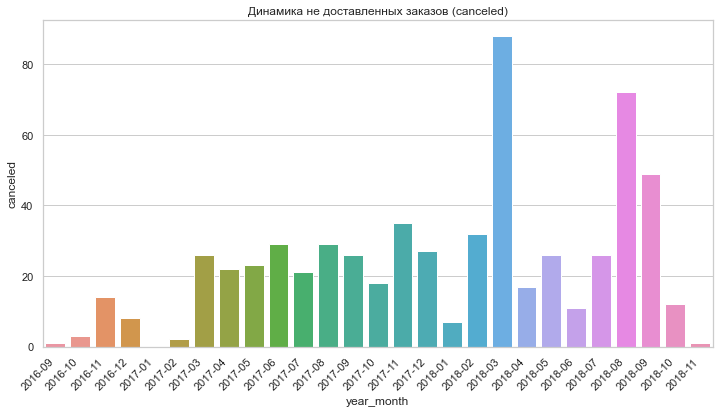

In [35]:
chart = sns.barplot(data=not_deliv_by_month, x='year_month', y='canceled')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Динамика не доставленных заказов (canceled)')
plt.show()

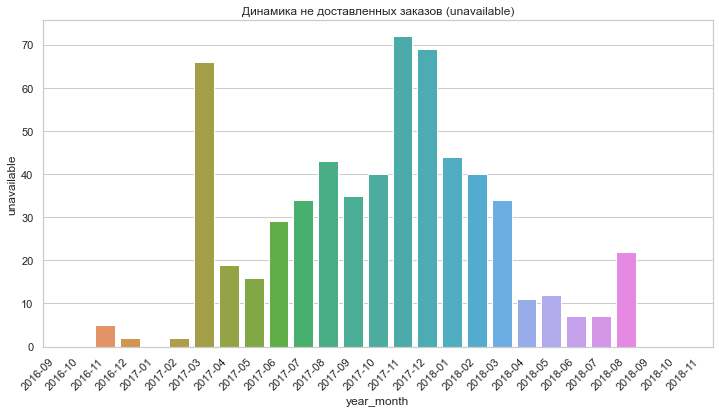

In [36]:
chart = sns.barplot(data=not_deliv_by_month, x='year_month', y='unavailable')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Динамика не доставленных заказов (unavailable)')
plt.show()

# Задание №3. 
### По каждому товару определить, в какой день недели товар чаще всего покупается.

In [37]:
orders_items = orders.merge(order_items, on='order_id', how='inner')

idx_not_appr_o_i = orders_items[['order_approved_at']].isna().query('order_approved_at == True').index

orders_items.order_approved_at = pd.to_datetime(orders_items.order_approved_at)
orders_items['day_of_week'] = orders_items['order_approved_at'].dt.day_name()
day_more_buy_product = orders_items \
    .query("(index not in @idx_not_appr_o_i) and (order_status not in ('canceled', 'unavailable'))") \
    .groupby(['product_id', 'day_of_week'], as_index=False) \
    .aggregate({'order_id':'count'}) \
    .rename(columns={'order_id':'purchases'}) \
    .sort_values(['product_id', 'purchases'], ascending=[False, False]) \
    .groupby('product_id', as_index=False) \
    .head(1)

day_more_buy_product

,product_id,day_of_week,purchases
60792,fffe9eeff12fcbd74a2f2b007dde0c58,Wednesday,1
60791,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,3
60788,fff9553ac224cec9d15d49f5a263411f,Saturday,1
60787,fff81cc3158d2725c0655ab9ba0f712c,Monday,1
60785,fff6177642830a9a94a0f2cba5e476d1,Monday,1
...,...,...,...
5,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1


# Задание №4. 
### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [38]:
customers_orders = customers_orders.query('(index not in @idx_not_appr) and (order_status != "unavailable" or order_status != "canceled")')
customers_orders.order_approved_at = pd.to_datetime(customers_orders.order_approved_at)
customers_orders['month_purchase'] = customers_orders.order_approved_at.dt.to_period('M')

purchases_months = customers_orders \
    .groupby(['customer_unique_id', 'month_purchase'], as_index=False) \
    .aggregate({'order_id':'count'})

#Поскольку нужно вывести сколько в среднем в неделю (по месяцам) совершает покупок каждый пользователь, сделаем сводную таблицу
min_month = purchases_months.month_purchase.min().to_timestamp()
max_month = purchases_months.month_purchase.max().to_timestamp()

months = pd.date_range(min_month, max_month, freq='W').to_frame().reset_index(drop=True)
months.columns = ['week']

temp_months = pd.date_range('2018-09-01', '2018-10-01', freq='W').to_frame().reset_index(drop=True)
temp_months.columns = ['week']
months = pd.concat([months, temp_months])
months['month'] = months.week.dt.to_period('M')

#Датафрейм, с датами покупок и количеством недель (для корректного подсчета среднего)
months = months.groupby('month', as_index=False).aggregate({'week':'count'}) \

user = customers_orders[['customer_unique_id', 'customer_id']]
user['key'] = 1
months['key'] = 1
user_months = user.merge(months, on='key')
user_months[['customer_unique_id', 'customer_id', 'month', 'week']]

purchases_months = customers_orders \
    .groupby(['customer_unique_id', 'month_purchase'], as_index=False) \
    .aggregate({'order_id':'count'})

purchases_months.columns = ['customer_unique_id', 'month', 'purchase']

report = user_months.merge(purchases_months, on=['customer_unique_id', 'month'], how='left')
report['mean_score'] = report['purchase'] / report['week']
report.pivot_table(index='customer_unique_id', columns='month', values='mean_score').fillna(0)

<ipython-input-38-75baad950d94>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user['key'] = 1


month,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.00,0.25,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.2,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,0.0,0.0,0.0,0.0,0.25,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [48]:
months

,month,week,key
0,2016-09,4,1
1,2016-10,5,1
2,2016-11,4,1
3,2016-12,4,1
4,2017-01,5,1
5,2017-02,4,1
6,2017-03,4,1
7,2017-04,5,1
8,2017-05,4,1
9,2017-06,4,1


# Задание №5
### Напиши функцию на python, позволяющую строить когортный анализ. В период с января по декабрь выяви когорту с самым высоким retention на 3-й месяц.

In [39]:
def cohort_analys(customers_orders, min_date_cohort, max_date_cohort, number_month):
    user_first_date_purchase = customers_orders \
        .groupby('customer_unique_id', as_index=False) \
        .aggregate({'order_approved_at':'min'}) \
        .rename(columns = {'order_approved_at':'date_first_purchase'})
    max_date_purchase = customers_orders.order_approved_at.max()
    min_date_purchase = customers_orders.order_approved_at.min()
    months = pd.DataFrame(pd.date_range(min_date_purchase, max_date_purchase, freq='MS'))
    user_first_date_purchase['key'] = 1
    months['key'] = 1
    months.columns = ['month', 'key']
    months.month = months.month.dt.strftime('%Y-%m')
    template = user_first_date_purchase.merge(months, on='key')[['customer_unique_id', 'date_first_purchase', 'month']]
    template = template.query('month >= date_first_purchase')
    purchases = customers_orders.groupby(['customer_unique_id', 'order_approved_at'], as_index=False) \
        .aggregate({'order_id':'count'}) \
        .rename(columns={'order_id':'number_purchase', 'order_approved_at':'month'})
    template = template.merge(purchases, on=['customer_unique_id', 'month'], how='left')
    template['active'] = (template.number_purchase > 0)*100
    template.month = pd.to_datetime(template.month)
    template.date_first_purchase = pd.to_datetime(template.date_first_purchase)
    template['cohort_period'] = round((template.month - template.date_first_purchase)/np.timedelta64(1, 'M')).astype(int)
    retention = template.pivot_table(index='date_first_purchase', columns='cohort_period', values='active', aggfunc='mean')
    final_retention = retention.loc[min_date_cohort:max_date_cohort, :number_month]
    return final_retention, final_retention[number_month].max(), str(final_retention[number_month].idxmax()).split()[0][:-3]

In [53]:
customers_orders = customers.merge(orders, on='customer_id', how='inner')
customers_orders = customers_orders.query("(index not in @idx_not_appr) and (order_status not in ('canceled', 'unavailable'))")
customers_orders.order_approved_at = pd.to_datetime(customers_orders.order_approved_at)
customers_orders.order_approved_at = customers_orders.order_approved_at.dt.strftime('%Y-%m')

date_start_analys = '2017-01'
date_end_analys = '2017-12'
number_months = 3
df, max_retention, date_max_retention = cohort_analys(customers_orders, date_start_analys, date_end_analys, number_months)
print('В процессе анализа с', date_start_analys, 'по', date_end_analys, 'самый высокий retention на',
      number_months, '- й месяц был выявлен для', date_max_retention, 'со значением =', round(max_retention, 5), '%')

df

В процессе анализа с 2017-01 по 2017-12 самый высокий retention на 3 - й месяц был выявлен для 2017-05 со значением = 0.39515 %


cohort_period,0,1,2,3
date_first_purchase,,,,
2017-01-01,100.0,0.558659,0.279330,0.139665
2017-02-01,100.0,0.238949,0.238949,0.179211
2017-03-01,100.0,0.503876,0.348837,0.348837
2017-04-01,100.0,0.608431,0.217297,0.173837
2017-05-01,100.0,0.536269,0.479819,0.395145
2017-06-01,100.0,0.450161,0.353698,0.385852
2017-07-01,100.0,0.529661,0.317797,0.185381
2017-08-01,100.0,0.674049,0.361098,0.264805
2017-09-01,100.0,0.659019,0.488162,0.341713


# Задание №6
### Построй RFM-кластеры для пользователей. Выведи для каждого кластера средние значения метрик R, F, M (и опиши подробно, как были построены метрики R, F, M).

In [42]:
def recency(days, r_3, r_2):
    if days <= r_3:
        return 3
    elif days <= r_2:
        return 2
    else:
        return 1
    

def frequency(purchases, f_1, f_2):
    if purchases <= f_1:
        return 1
    elif purchases <= f_2:
        return 2
    else:
        return 3


def monetary_score(money, m_1, m_2):
    if money <= m_1:
        return 1
    elif money <= m_2:
        return 2
    else:
        return 3

In [43]:
#Отрицательной цены нет / есть заказы, где несколько товаров
#, как такового quantity не существует, добавляются просто по одному много раз
cust_ord_prod = customers.merge(orders, on=['customer_id']).merge(order_items, on='order_id')
idx_not_appr_date = cust_ord_prod[['order_approved_at']].isna().query('order_approved_at == True').index
cust_ord_prod.order_approved_at = pd.to_datetime(cust_ord_prod.order_approved_at)
cust_ord_prod = cust_ord_prod \
    .query("(index not in @idx_not_appr_date) and (order_status not in ('canceled', 'unavailable'))")


cust = cust_ord_prod \
    .groupby('customer_unique_id', as_index=False) \
    .aggregate({'price':'sum', 'order_approved_at':'max', 'order_id':'nunique'}) \
    .rename(columns={'price':'total_price', 'order_approved_at':'max_date_purchase','order_id':'total_order'})

max_date = cust.max_date_purchase.max()
cust['difference_date'] = cust.max_date_purchase.apply(lambda x: max_date - x)
cust.difference_date = cust.difference_date.dt.days.astype('int16')

r_score_3 = cust['difference_date'].quantile(0.33)
r_score_2 = cust['difference_date'].quantile(0.66)

f_score_1 = cust['total_order'].quantile(0.33)
f_score_2 = cust['total_order'].quantile(0.66)

m_score_1 = cust['total_price'].quantile(0.33)
m_score_2 = cust['total_price'].quantile(0.66)

cust['recency'] = cust.difference_date.apply(lambda x: recency(x, r_score_3, r_score_2))
cust['frequency'] = cust.total_order.apply(lambda x: frequency(x, f_score_1, f_score_2))
cust['monetary_score'] = cust.total_price.apply(lambda x: monetary_score(x, m_score_1, m_score_2))
cust['rfm'] = cust.apply(lambda x: str(x.recency) + str(x.frequency) + str(x.monetary_score), axis=1)

C:\Users\zhare\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='difference_date', ylabel='Density'>

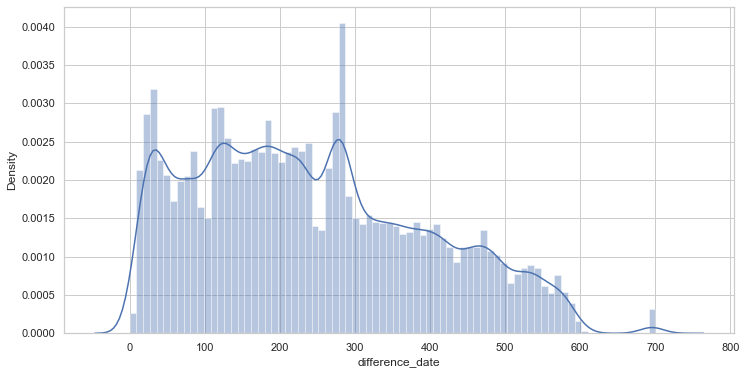

In [44]:
sns.distplot(cust.difference_date, bins=80)

C:\Users\zhare\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='recency', ylabel='count'>

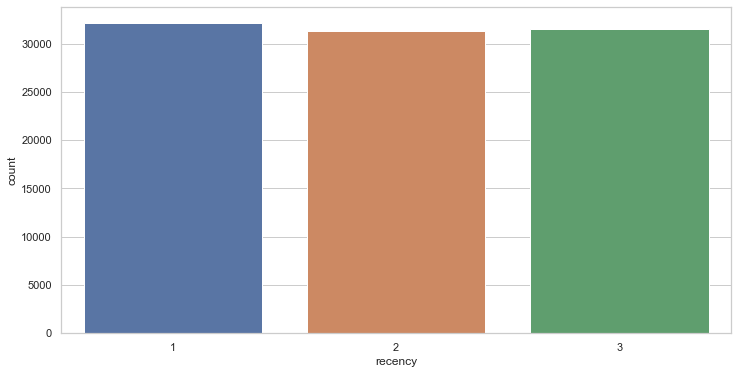

In [45]:
sns.countplot(cust.recency)

C:\Users\zhare\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_order'>

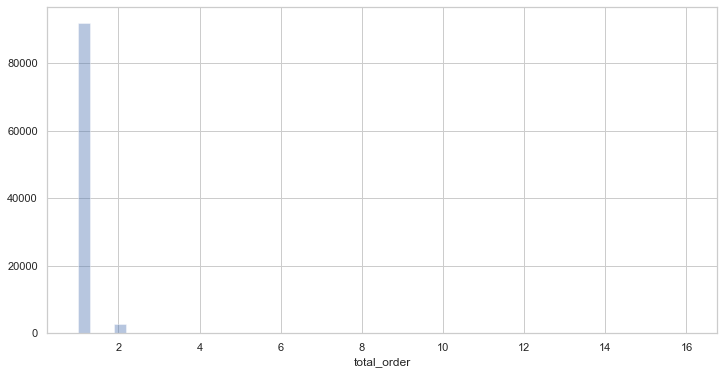

In [46]:
sns.distplot(cust.total_order, kde=False)

C:\Users\zhare\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='frequency', ylabel='count'>

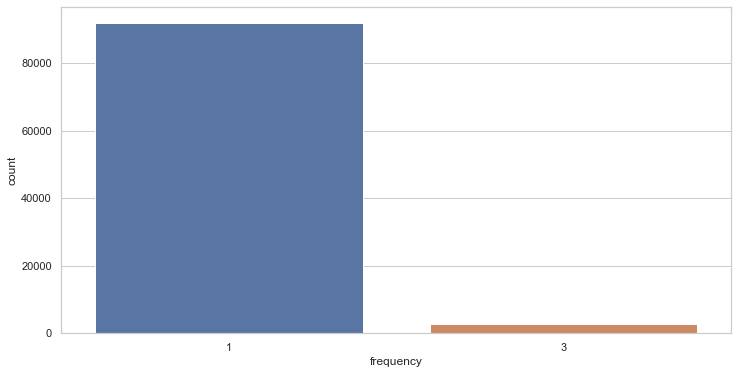

In [47]:
sns.countplot(cust.frequency)

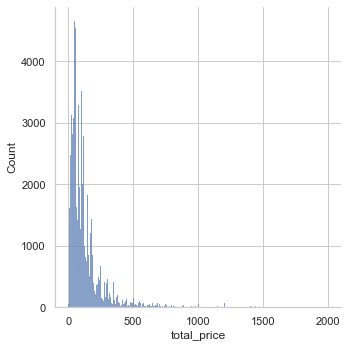

In [48]:
sns.displot(cust[cust.total_price < 2000].total_price)

C:\Users\zhare\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='monetary_score', ylabel='count'>

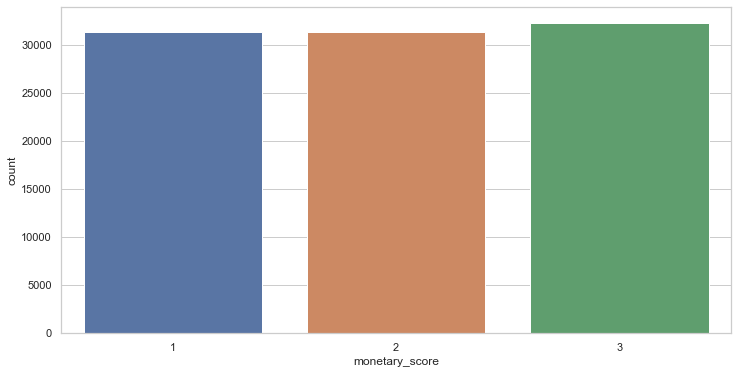

In [49]:
sns.countplot(cust.monetary_score)

<AxesSubplot:xlabel='count', ylabel='rfm'>

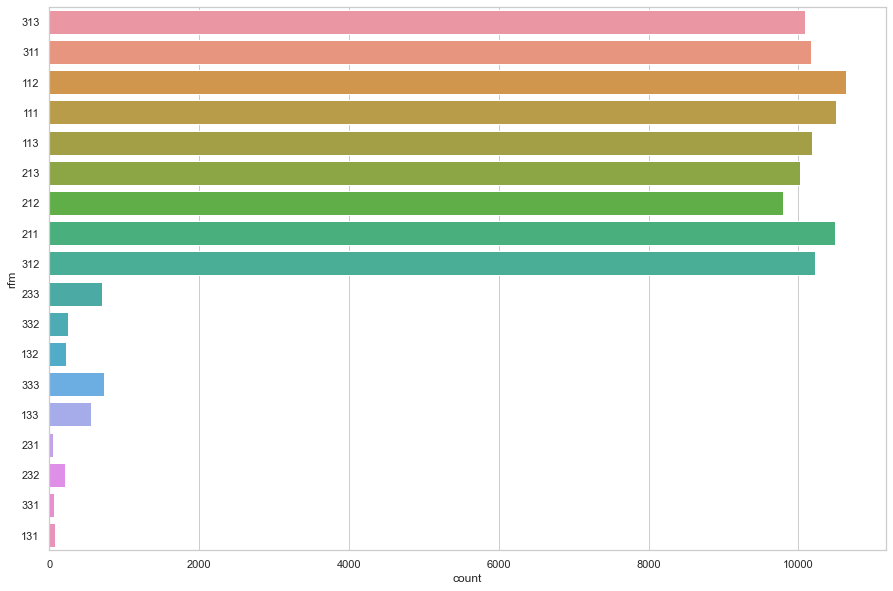

In [50]:
plt.figure(figsize=[15,10])
sns.countplot(y=cust.rfm)

In [51]:
rfm_clasters = list(cust.rfm.unique())
r_mean = []
f_mean = []
m_mean = []
for claster in rfm_clasters:
    r_mean.append(cust.query("rfm == @claster").aggregate({'difference_date':'mean'}).squeeze())
    f_mean.append(cust.query("rfm == @claster").aggregate({'total_order':'mean'}).squeeze())
    m_mean.append(cust.query("rfm == @claster").aggregate({'total_price':'mean'}).squeeze())

rfm_mean = pd.DataFrame({'name_claster':rfm_clasters, 'r_mean': r_mean, 'f_mean': f_mean, 'm_mean': m_mean})
rfm_mean

,name_claster,r_mean,f_mean,m_mean
0,313,80.714130,1.000000,300.385029
1,311,78.317882,1.000000,34.717524
2,112,419.454075,1.000000,86.601391
3,111,422.745048,1.000000,34.397040
4,113,421.313943,1.000000,307.704889
5,213,222.728135,1.000000,279.311550
6,212,224.307087,1.000000,88.715345
7,211,222.433038,1.000000,34.788448
8,312,79.981993,1.000000,89.369033
9,233,220.563559,2.117232,318.639280
